## Install the required library

In [55]:
%pip install matplotlib pandas numpy seaborn wordcloud


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Library

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
raw_df = pd.read_csv('../Data/data_clean.csv')

In [58]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_id         116 non-null    int64  
 1   text            116 non-null    object 
 2   post_text       116 non-null    object 
 3   time            116 non-null    object 
 4   timestamp       116 non-null    float64
 5   comments        116 non-null    int64  
 6   shares          116 non-null    int64  
 7   comments_full   116 non-null    object 
 8   reactors        116 non-null    object 
 9   reactions       116 non-null    object 
 10  reaction_count  116 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 10.1+ KB


In [59]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [60]:
reactions

{'thích': 57337,
 'yêu thích': 23601,
 'haha': 86,
 'wow': 38,
 'thương thương': 1462,
 'buồn': 9,
 'phẫn nộ': 15,
 'shares': 761,
 'comments': 1819}

## Reactions analysis

In [61]:
post_df = pd.DataFrame(raw_df)

In [62]:
# Thống kê ra các lượt thích, yêu thích, haha, ...
post_reaction = post_df
post_reaction[['post_id', 'reactions']]

,post_id,reactions
0,889347669219012,"{'thích': 57337, 'yêu thích': 23601, 'haha': 8..."
1,885191366301309,"{'thích': 35408, 'yêu thích': 13633, 'haha': 2..."
2,883053229848456,"{'thích': 32175, 'yêu thích': 10944, 'haha': 2..."
3,875769617243484,"{'thích': 35597, 'yêu thích': 15372, 'haha': 3..."
4,870104804476632,"{'thích': 19669, 'yêu thích': 7898, 'haha': 12..."
...,...,...
111,498546568299126,"{'thích': 27097, 'yêu thích': 11256, 'haha': 5..."
112,470915591062224,"{'thích': 61407, 'yêu thích': 25280, 'haha': 1..."
113,469016147918835,"{'thích': 43880, 'yêu thích': 19954, 'haha': 1..."
114,467163998104050,"{'thích': 98268, 'yêu thích': 34632, 'haha': 1..."


In [63]:
post_df['reaction_count'].mean()

91513.99137931035

In [64]:
# thống kê tổng số lượt react bài đăng
post_reactions_count = post_df[['time', 'timestamp', 'reaction_count']]
post_reactions_count 

,time,timestamp,reaction_count
0,2023-10-30 01:52:25,1.698606e+09,82548
1,2023-10-22 03:23:53,1.697920e+09,49924
2,2023-10-18 04:34:38,1.697578e+09,43853
3,2023-10-05 05:13:06,1.696458e+09,52049
4,2023-09-24 00:14:37,1.695489e+09,28143
...,...,...,...
111,2022-02-13 03:50:19,1.644699e+09,38791
112,2021-12-30 06:21:29,1.640820e+09,87706
113,2021-12-27 00:51:10,1.640541e+09,64650
114,2021-12-24 01:41:40,1.640285e+09,134266


In [65]:
x = post_reactions_count['time'].to_list()
y = post_reactions_count['reaction_count'].to_list()

x.reverse()
y.reverse()

print(len(x), len(y))
print(x)
print(y)


116 116
['2021-12-15 23:08:12', '2021-12-24 01:41:40', '2021-12-27 00:51:10', '2021-12-30 06:21:29', '2022-02-13 03:50:19', '2022-02-16 06:53:53', '2022-02-27 04:34:41', '2022-03-21 01:30:25', '2022-04-06 05:37:03', '2022-04-27 04:38:10', '2022-05-01 03:09:24', '2022-05-09 03:10:15', '2022-05-19 23:27:48', '2022-05-21 16:18:46', '2022-05-23 04:07:20', '2022-05-23 23:29:59', '2022-05-29 21:21:53', '2022-06-10 01:37:27', '2022-06-12 21:37:47', '2022-07-14 03:48:09', '2022-07-14 23:41:23', '2022-07-16 01:55:37', '2022-07-27 04:40:19', '2022-07-27 23:22:53', '2022-07-30 02:39:36', '2022-07-31 03:14:25', '2022-07-31 23:06:38', '2022-08-03 15:29:11', '2022-08-05 16:42:10', '2022-08-07 02:13:40', '2022-08-08 01:57:02', '2022-08-13 02:07:27', '2022-08-13 23:39:35', '2022-08-20 21:06:09', '2022-08-22 02:25:53', '2022-08-25 06:48:51', '2022-08-28 00:35:15', '2022-09-01 07:01:58', '2022-09-03 04:35:43', '2022-09-04 03:53:28', '2022-09-06 01:34:03', '2022-09-07 04:56:31', '2022-09-14 01:48:19', '2

Text(0, 0.5, 'reaction_count')

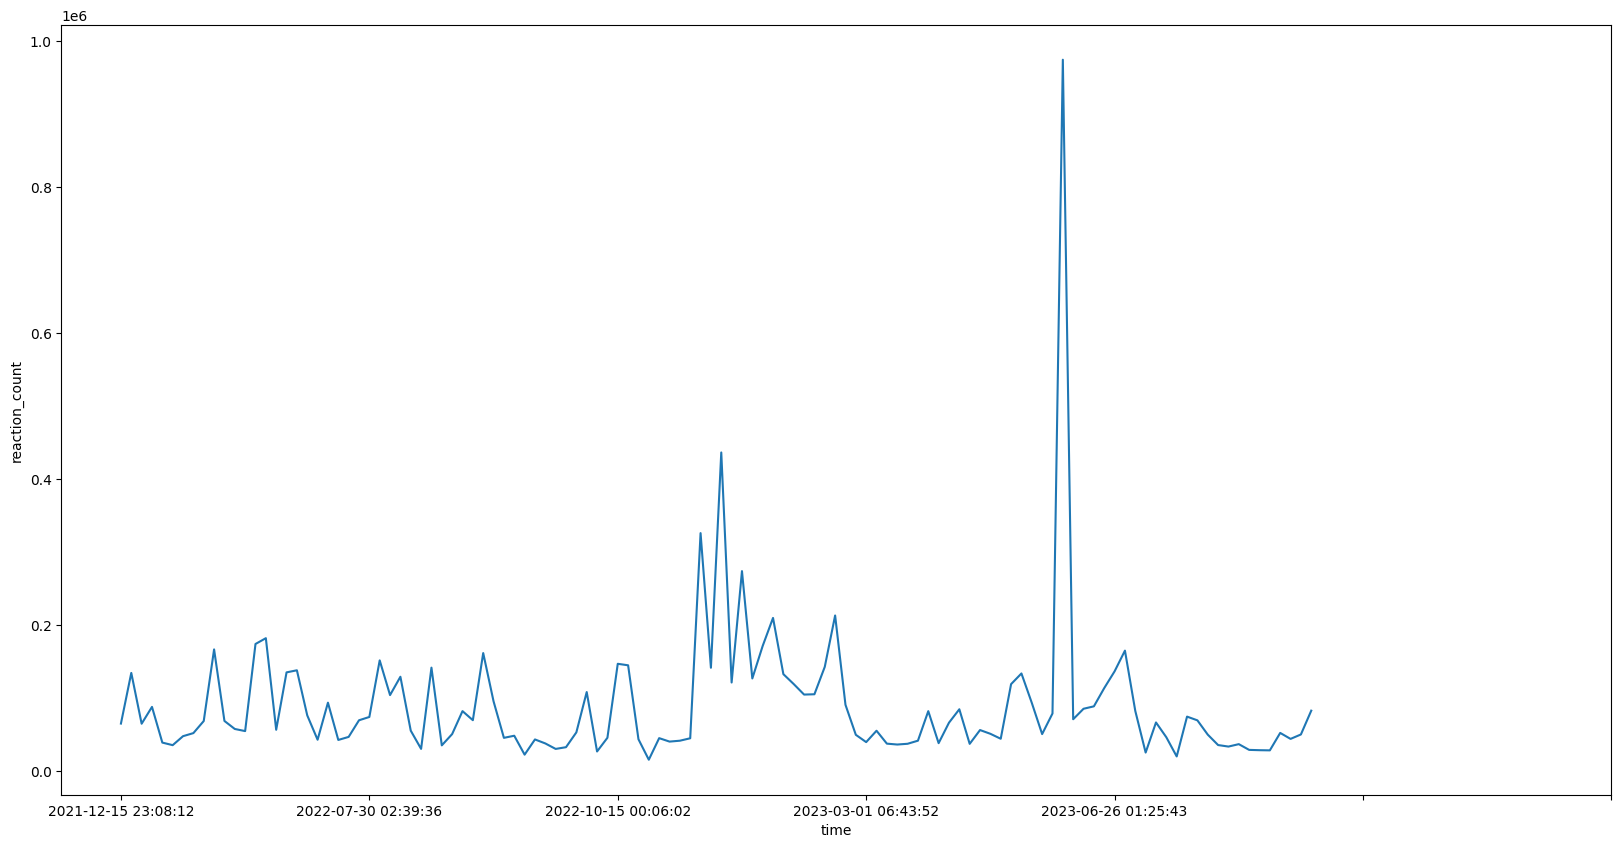

In [66]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(np.arange(0, 24 * 7, 24))
ax.set_xlabel('time')
ax.set_ylabel('reaction_count')

In [67]:
post_reaction['reactions'] = post_reaction['reactions'].apply(lambda x : dict(eval(str(x))))
full_reactions = post_reaction['reactions'].apply(pd.Series)
post_full_reactions = pd.concat([post_reaction, full_reactions], axis=1).drop('reactions', axis=1)
post_full_reactions[['post_text', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 
                             'phẫn nộ', 'thương thương', 'shares', 'comments','reaction_count']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"CITY CITY CITY 🔵 Thanks my mate, @erling.haala...",57337.0,23601.0,86.0,38.0,9.0,15.0,1462.0,761,1819,82548
1,No place like home 🏡\n\nKhông đâu bằng nhà 🏡,35408.0,13633.0,25.0,18.0,2.0,3.0,835.0,281,722,49924
2,Our #EURO2024 place secured 🔒 Proud of this te...,32175.0,10944.0,21.0,15.0,1.0,33.0,664.0,252,594,43853
3,Enjoyed that one! 😁\n\nRất thích điều đó! 😁,35597.0,15372.0,30.0,24.0,1.0,2.0,1023.0,452,962,52049
4,Another W 😎 Nice to get a goal too 🙏🏻\n\nMột W...,19669.0,7898.0,12.0,14.0,NaN,3.0,547.0,189,599,28143
...,...,...,...,...,...,...,...,...,...,...,...
111,3️⃣ Points 1️⃣ Goal on the road. Let’s be havi...,27097.0,11256.0,51.0,17.0,8.0,4.0,358.0,256,1101,38791
112,Goal and three points… no better way to end th...,61407.0,25280.0,136.0,46.0,14.0,9.0,814.0,726,2685,87706
113,A Christmas cracker!! Enjoy City fans 🎄🎉\n\nMộ...,43880.0,19954.0,133.0,39.0,10.0,18.0,616.0,574,1656,64650
114,❄️❄️,98268.0,34632.0,178.0,95.0,14.0,11.0,1068.0,1090,2790,134266


In [68]:
post_df.shape[0]

116

In [69]:
for i in range(post_df.shape[0]):
    if pd.isna(post_full_reactions['thích'].values[i]):
        post_full_reactions['thích'].values[i] = 0
    if pd.isna(post_full_reactions['yêu thích'].values[i]):
        post_full_reactions['yêu thích'].values[i] = 0
    if pd.isna(post_full_reactions['haha'].values[i]):
        post_full_reactions['haha'].values[i] = 0
    if pd.isna(post_full_reactions['wow'].values[i]):
        post_full_reactions['wow'].values[i] = 0
    if pd.isna(post_full_reactions['buồn'].values[i]):
        post_full_reactions['buồn'].values[i] = 0
    if pd.isna(post_full_reactions['phẫn nộ'].values[i]):
        post_full_reactions['phẫn nộ'].values[i] = 0
    if pd.isna(post_full_reactions['thương thương'].values[i]):
        post_full_reactions['thương thương'].values[i] = 0
        
        
post_full_reactions[['post_text', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương', 'shares', 'comments','reaction_count']]


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,"CITY CITY CITY 🔵 Thanks my mate, @erling.haala...",57337.0,23601.0,86.0,38.0,9.0,15.0,1462.0,761,1819,82548
1,No place like home 🏡\n\nKhông đâu bằng nhà 🏡,35408.0,13633.0,25.0,18.0,2.0,3.0,835.0,281,722,49924
2,Our #EURO2024 place secured 🔒 Proud of this te...,32175.0,10944.0,21.0,15.0,1.0,33.0,664.0,252,594,43853
3,Enjoyed that one! 😁\n\nRất thích điều đó! 😁,35597.0,15372.0,30.0,24.0,1.0,2.0,1023.0,452,962,52049
4,Another W 😎 Nice to get a goal too 🙏🏻\n\nMột W...,19669.0,7898.0,12.0,14.0,0.0,3.0,547.0,189,599,28143
...,...,...,...,...,...,...,...,...,...,...,...
111,3️⃣ Points 1️⃣ Goal on the road. Let’s be havi...,27097.0,11256.0,51.0,17.0,8.0,4.0,358.0,256,1101,38791
112,Goal and three points… no better way to end th...,61407.0,25280.0,136.0,46.0,14.0,9.0,814.0,726,2685,87706
113,A Christmas cracker!! Enjoy City fans 🎄🎉\n\nMộ...,43880.0,19954.0,133.0,39.0,10.0,18.0,616.0,574,1656,64650
114,❄️❄️,98268.0,34632.0,178.0,95.0,14.0,11.0,1068.0,1090,2790,134266


In [70]:
post_full_reactions['time']

0      2023-10-30 01:52:25
1      2023-10-22 03:23:53
2      2023-10-18 04:34:38
3      2023-10-05 05:13:06
4      2023-09-24 00:14:37
              ...         
111    2022-02-13 03:50:19
112    2021-12-30 06:21:29
113    2021-12-27 00:51:10
114    2021-12-24 01:41:40
115    2021-12-15 23:08:12
Name: time, Length: 116, dtype: object

Text(0, 0.5, 'Lượt tương tác')

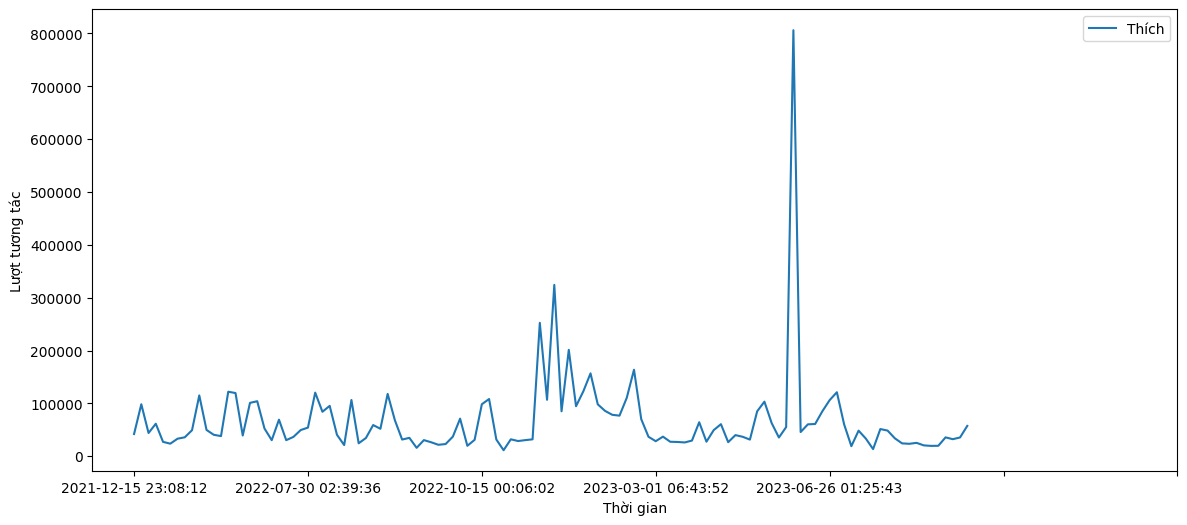

In [71]:
time = post_full_reactions['time'].to_list()
like = post_full_reactions['thích'].to_list()
time.reverse(), like.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, like, label = 'Thích')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

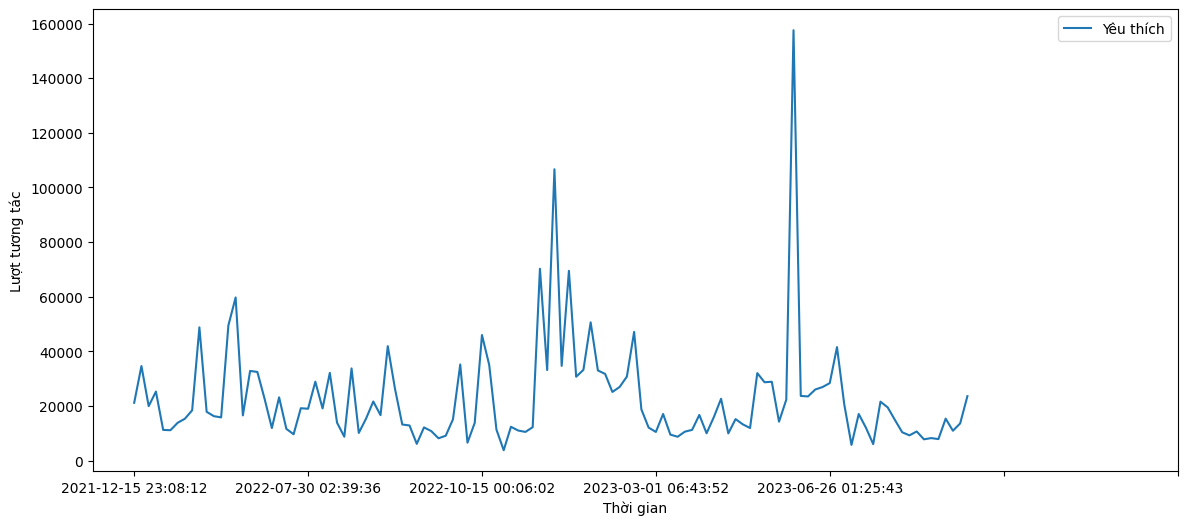

In [72]:
time = post_full_reactions['time'].to_list()
love = post_full_reactions['yêu thích'].to_list()
time.reverse(), love.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, love, label = 'Yêu thích')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

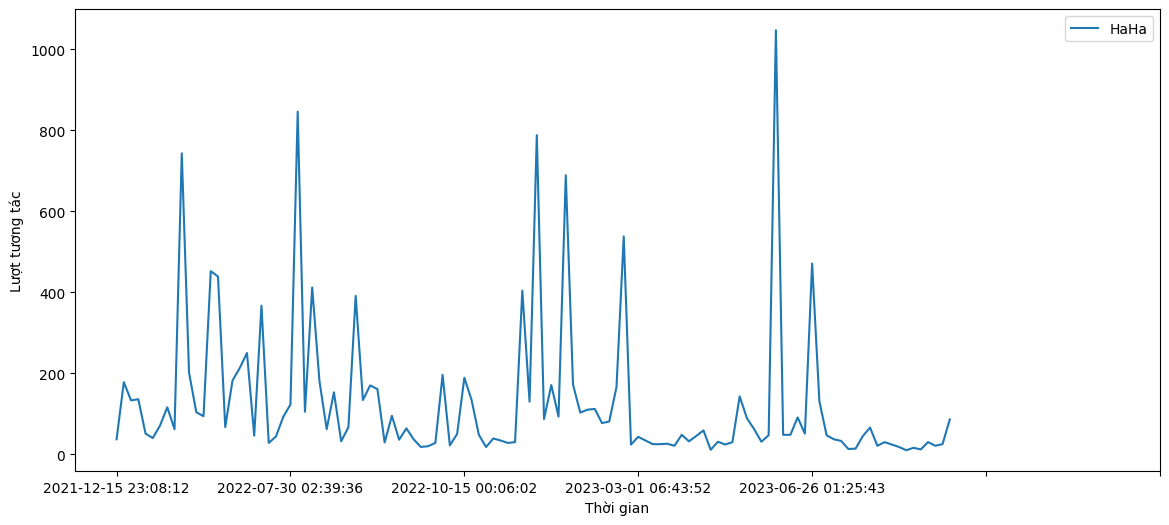

In [73]:
time = post_full_reactions['time'].to_list()
haha = post_full_reactions['haha'].to_list()
time.reverse(), haha.reverse()
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, haha, label = 'HaHa')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

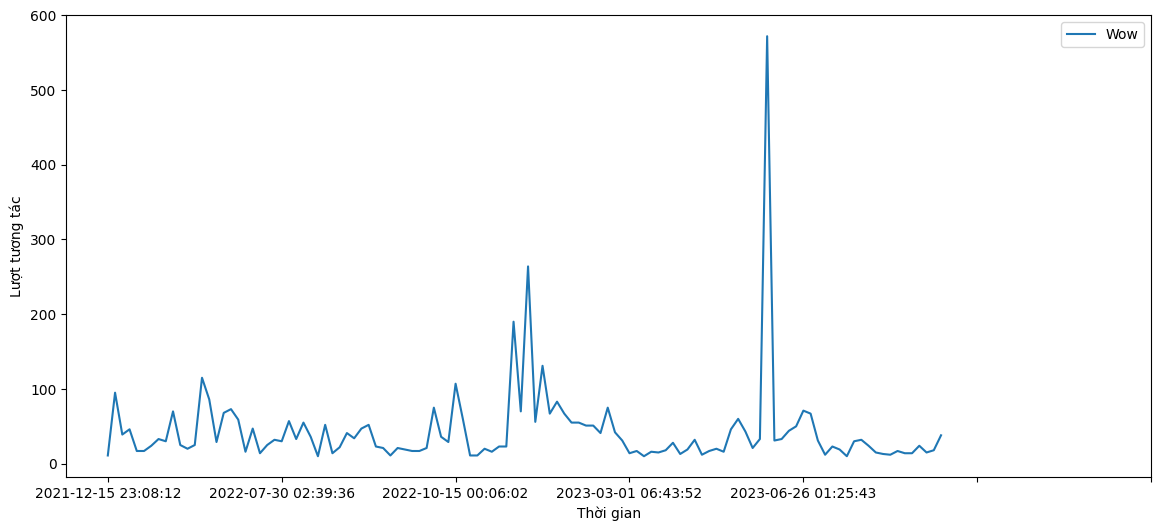

In [74]:
time = post_full_reactions['time'].to_list()
wow = post_full_reactions['wow'].to_list()
reactions_count = post_full_reactions['reaction_count'].to_list()
time.reverse(), wow.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, wow, label = 'Wow')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

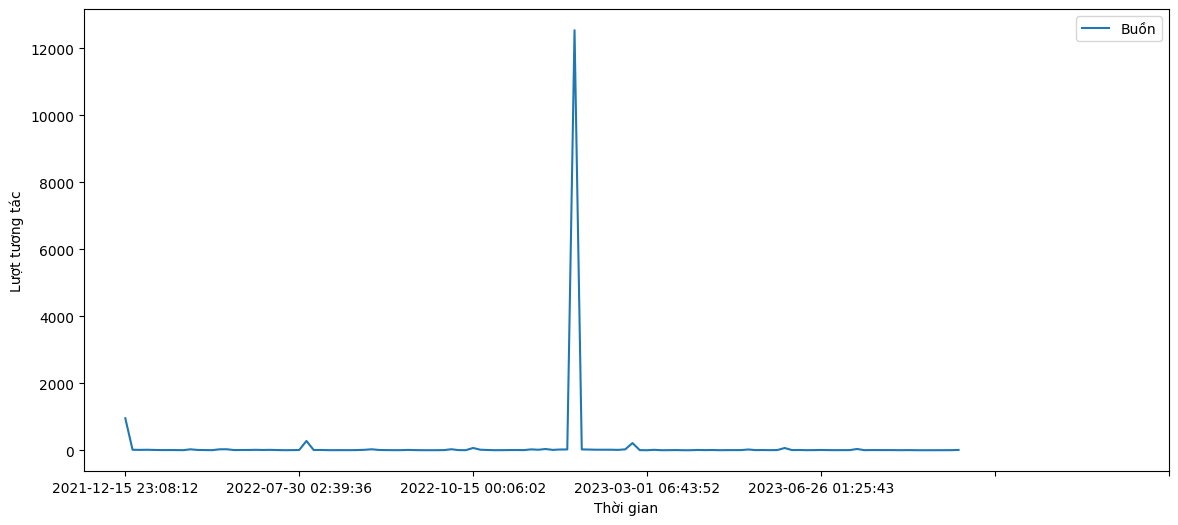

In [75]:
time = post_full_reactions['time'].to_list()
sad = post_full_reactions['buồn'].to_list()
time.reverse(), sad.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, sad, label = 'Buồn')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

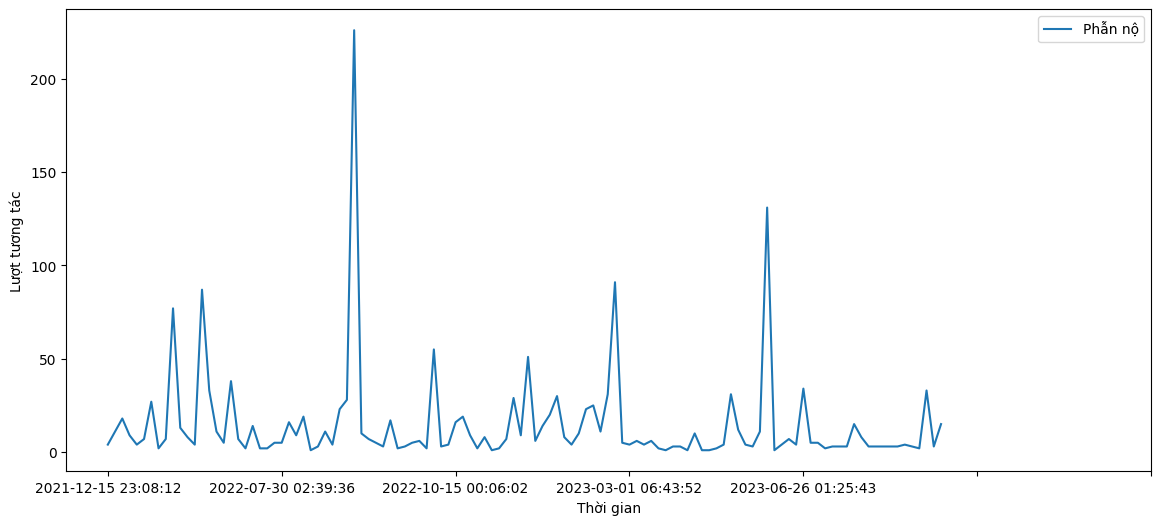

In [76]:
time = post_full_reactions['time'].to_list()
angry = post_full_reactions['phẫn nộ'].to_list()
time.reverse(), angry.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, angry, label = 'Phẫn nộ')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

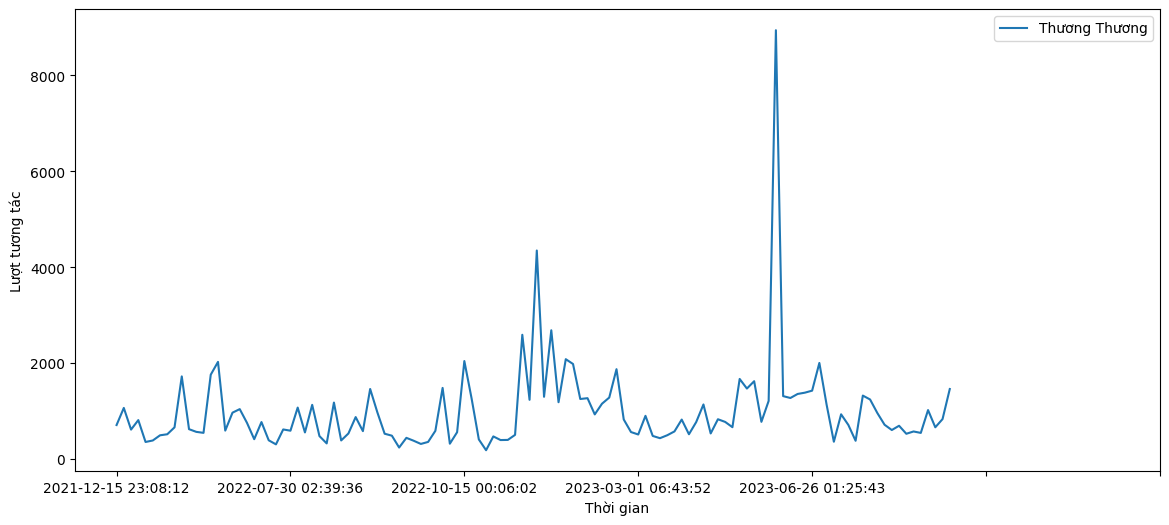

In [77]:
time = post_full_reactions['time'].to_list()
care = post_full_reactions['thương thương'].to_list()

time.reverse(), care.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, care, label = 'Thương Thương')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

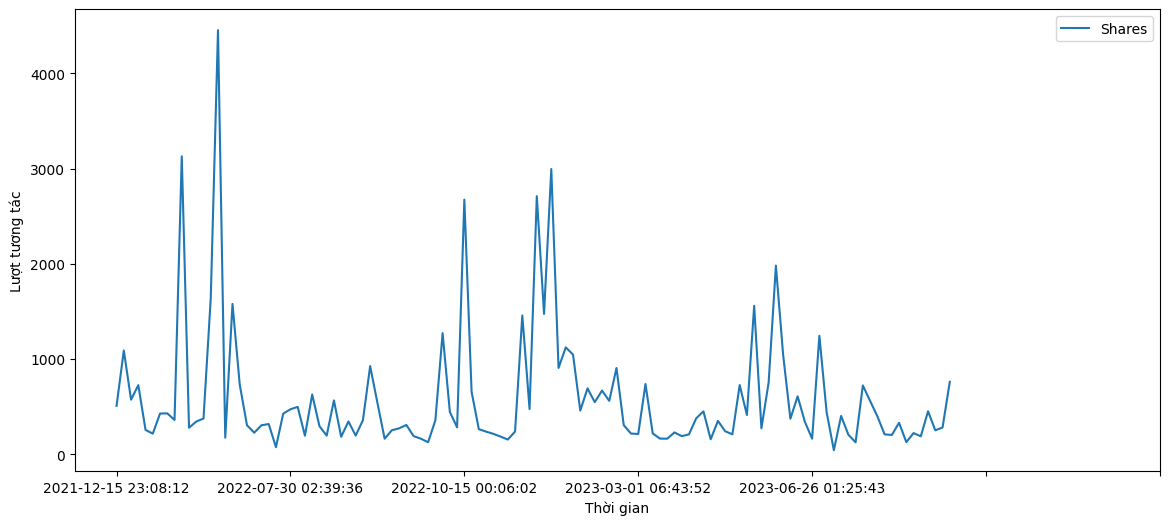

In [78]:
time = post_full_reactions['time'].to_list()
share = post_full_reactions['shares'].to_list()
time.reverse(), share.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, share, label = 'Shares')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

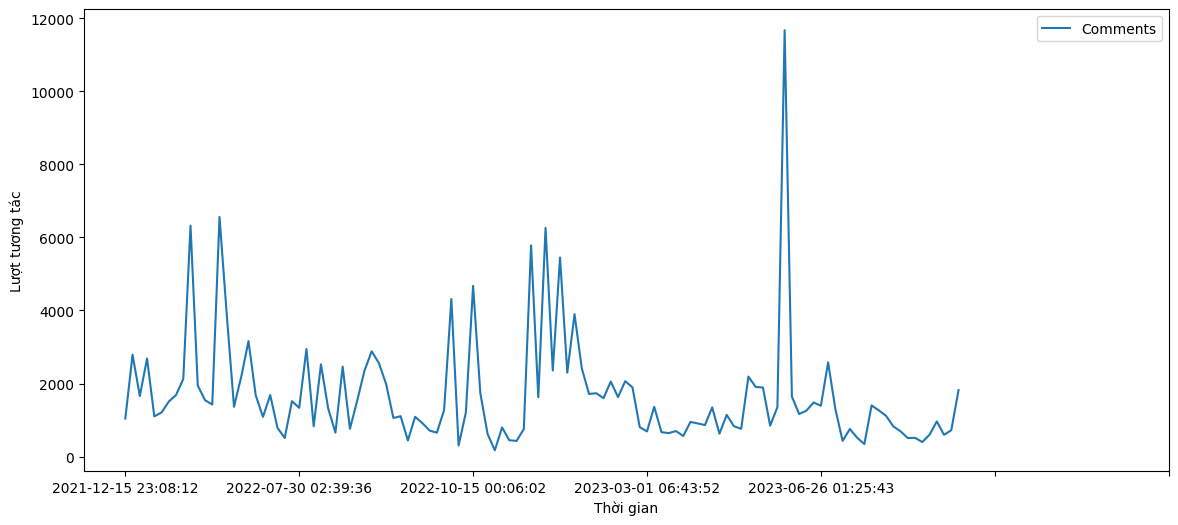

In [79]:
time = post_full_reactions['time'].to_list()
comments = post_full_reactions['comments'].to_list()
time.reverse(), share.reverse(), comments.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, comments, label = 'Comments')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

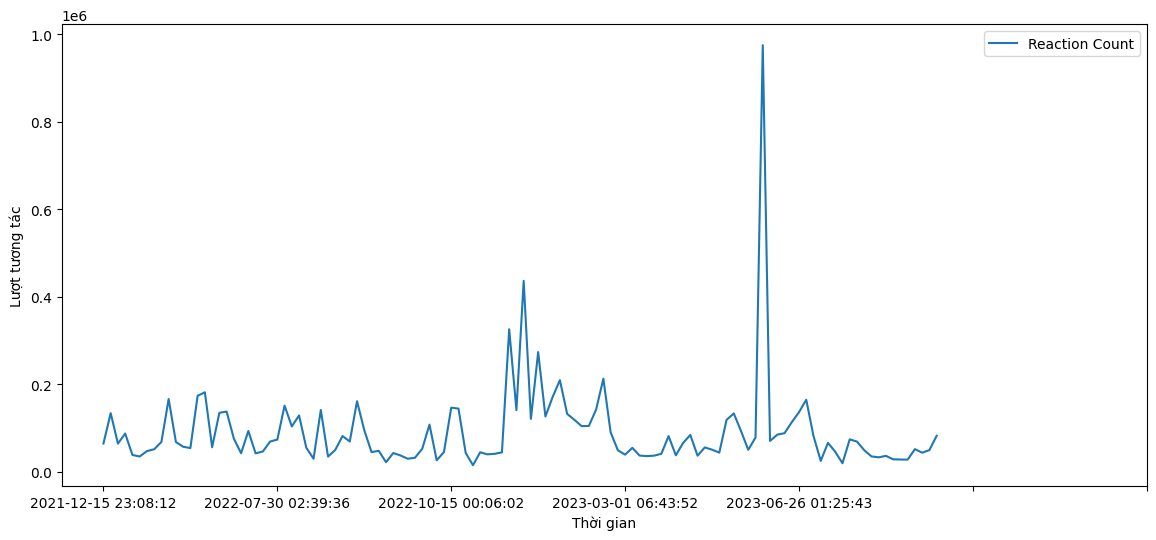

In [80]:
time = post_full_reactions['time'].to_list()
reactions_count = post_full_reactions['reaction_count'].to_list()
time.reverse(), reactions_count.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, reactions_count, label = 'Reaction Count')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

Text(0, 0.5, 'Lượt tương tác')

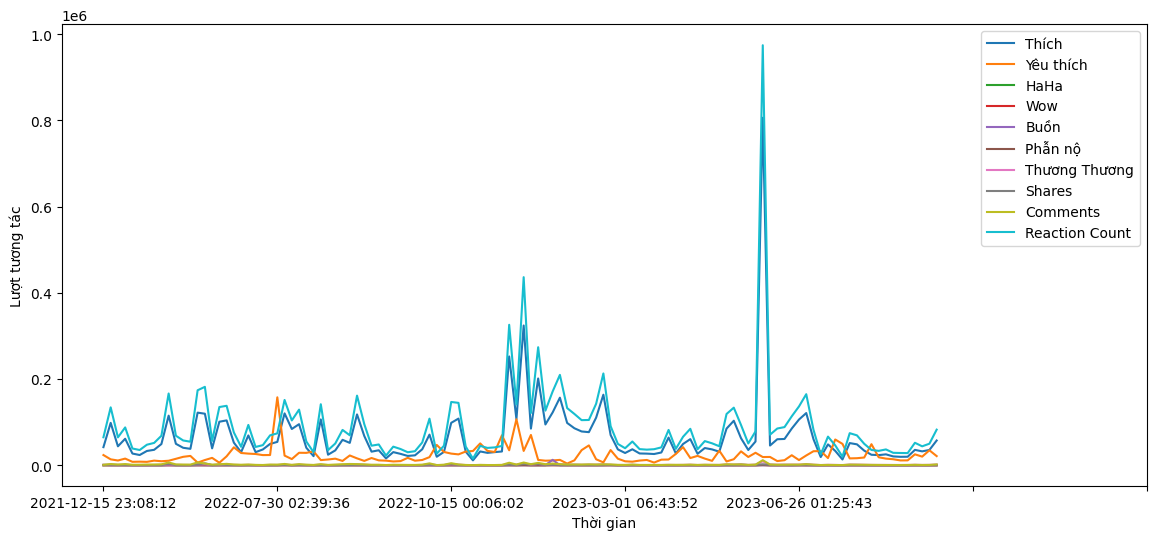

In [81]:
time = post_full_reactions['time'].to_list()
like = post_full_reactions['thích'].to_list()
love = post_full_reactions['yêu thích'].to_list()
haha = post_full_reactions['haha'].to_list()
wow = post_full_reactions['wow'].to_list()
sad = post_full_reactions['buồn'].to_list()
angry = post_full_reactions['phẫn nộ'].to_list()
care = post_full_reactions['thương thương'].to_list()
share = post_full_reactions['shares'].to_list()
comments = post_full_reactions['comments'].to_list()
reactions_count = post_full_reactions['reaction_count'].to_list()
time.reverse(), like.reverse(), haha.reverse(), wow.reverse(), sad.reverse(), angry.reverse(), care.reverse(), share.reverse(), comments.reverse(), reactions_count.reverse()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot()
ax.plot(time, like, label = 'Thích')
ax.plot(time, love, label = 'Yêu thích')
ax.plot(time, haha, label = 'HaHa')
ax.plot(time, wow, label = 'Wow')
ax.plot(time, sad, label = 'Buồn')
ax.plot(time, angry, label = 'Phẫn nộ')
ax.plot(time, care, label = 'Thương Thương')
ax.plot(time, share, label = 'Shares')
ax.plot(time, comments, label = 'Comments')
ax.plot(time, reactions_count, label = 'Reaction Count')
ax.set_xticks(np.arange(0, 24 * 7, 24))
plt.legend()
ax.set_xlabel('Thời gian')
ax.set_ylabel('Lượt tương tác')

In [82]:
print(post_full_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']].corrwith(post_full_reactions['shares']))

thích            0.525517
yêu thích        0.729790
haha             0.547736
wow              0.552648
buồn             0.077397
phẫn nộ          0.318153
thương thương    0.613716
dtype: float64


In [83]:
tuong_tac = post_full_reactions.copy()
max_reaction = max(tuong_tac['reaction_count'])
a = ''
for i in range(tuong_tac.shape[0]):
    if tuong_tac['reaction_count'][i] == max_reaction:
        a = tuong_tac.loc[i]
        print(a)

post_id                                             815092239977889
text                                  Let’s go ✈️🇹🇷\n\nĐi thôi ✈️🇹🇷
post_text                             Let’s go ✈️🇹🇷\n\nĐi thôi ✈️🇹🇷
time                                            2023-06-09 04:07:55
timestamp                                              1686258475.0
comments                                                      11675
shares                                                         1981
comments_full     [{'comment_id': '24090374927220099', 'comment_...
reactors          [{'name': 'Aïcha Hillal', 'link': 'https://fac...
reaction_count                                               974503
thích                                                      806200.0
yêu thích                                                  157544.0
haha                                                         1047.0
wow                                                           572.0
thương thương                                   

In [84]:
a[['post_text', 'time', 'comments', 'shares', 'reaction_count', 'thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ']]

post_text         Let’s go ✈️🇹🇷\n\nĐi thôi ✈️🇹🇷
time                        2023-06-09 04:07:55
comments                                  11675
shares                                     1981
reaction_count                           974503
thích                                  806200.0
yêu thích                              157544.0
haha                                     1047.0
wow                                       572.0
thương thương                            8943.0
buồn                                       66.0
phẫn nộ                                   131.0
Name: 24, dtype: object

+ Chủ yếu lượt tương tác đến từ lượt "Thích" và "Yêu thích"

# Posts analysis

### 1. Bài viết có lượng tương tác lớn nhất

In [85]:
post_df['total_interaction'] = post_df['reaction_count'] + post_df['comments'] + post_df['shares']
highest_interaction_post = post_df.loc[post_df['total_interaction'] == post_df['total_interaction'].max()]

In [86]:
highest_interaction_post

,post_id,text,post_text,time,timestamp,comments,shares,comments_full,reactors,reactions,reaction_count,total_interaction
24,815092239977889,Let’s go ✈️🇹🇷\n\nĐi thôi ✈️🇹🇷,Let’s go ✈️🇹🇷\n\nĐi thôi ✈️🇹🇷,2023-06-09 04:07:55,1.686258e+09,11675,1981,"[{'comment_id': '24090374927220099', 'comment_...","[{'name': 'Aïcha Hillal', 'link': 'https://fac...","{'thích': 806200, 'yêu thích': 157544, 'haha':...",974503,988159


### 2. Mốc thời gian đăng bài

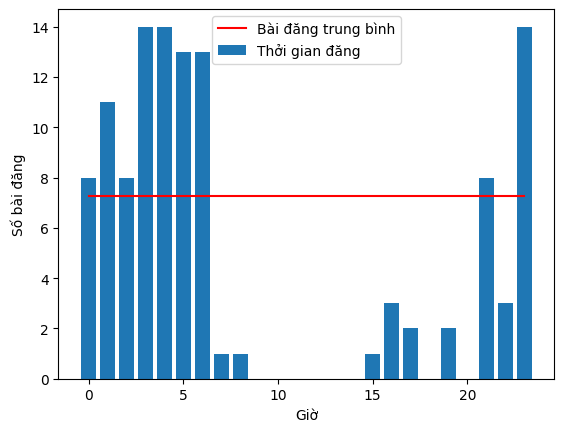

In [87]:
# Chuyển cột 'time' sang định dạng thời gian nếu chưa có
post_df['time'] = pd.to_datetime(post_df['time'])

# Trích xuất giờ từ cột thời gian
post_df['hour'] = post_df['time'].dt.hour

# Tiếp tục với phần plot
plot_data = post_df['hour'].value_counts().sort_index()
mean = post_df['hour'].value_counts().mean() * np.ones(len(plot_data))
plt.bar(plot_data.index, plot_data.values, label='Thởi gian đăng')
plt.plot(plot_data.index, mean, color='red', label='Bài đăng trung bình')
plt.legend()
plt.ylabel('Số bài đăng')
plt.xlabel('Giờ')
plt.show()


### 3. Tìm các bài viết chứa 1 từ khóa nào đó


In [88]:
a = post_full_reactions['post_text'].tolist()

res = []
for x in a:
    if 'champions' in str(x).lower():
        res.append(x)

print('Số bài viết có từ "champions":',len(res))
res

Số bài viết có từ "champions": 7


['Champions League nights are back…\n\nĐêm Champions League đã trở lại...',
 'Champions of Europe!!!! This club man, what a dream come true 🤩\U0001fa75🏆\n\nNhà vô địch Châu Âu!!!! Câu lạc bộ này, thật là một giấc mơ trở thành sự thật 🤩\U0001fa75🏆',
 'Big night coming up! @championsleague 🔜\n\nĐêm quan trọng sắp đến! @championsleague 🔜',
 '@championsleague 🔜',
 'It feels mint to be back playing in the Champions League! So pleased to have got my 10th CL goal and my 47th for City 🙏🏻 Cheers for all the support 👊🏻💙\n\nCảm giác bạc hà khi được quay trở lại thi đấu tại Champions League! Rất vui mừng khi có được bàn thắng thứ 10 CL và thứ 47 của tôi cho City 🙏🏻 Chúc mừng vì tất cả sự ủng hộ 👊🏻💙',
 'Champions League mode 🔛\n\n#ucl\n\nChế độ Champions League 🔛\n\n#ucl',
 'Champions!! I’ll never get bored of the feeling!! What a team!! 🏆🔥💙\n\nNhà vô địch!! Tôi sẽ không bao giờ chán cảm giác đó!! Thật là một đội hình!! 🏆🔥💙']

In [89]:
df_text = post_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,889347669219012,"CITY CITY CITY 🔵 Thanks my mate, @erling.haala..."
1,885191366301309,No place like home 🏡\n\nKhông đâu bằng nhà 🏡
2,883053229848456,Our #EURO2024 place secured 🔒 Proud of this te...
3,875769617243484,Enjoyed that one! 😁\n\nRất thích điều đó! 😁
4,870104804476632,Another W 😎 Nice to get a goal too 🙏🏻\n\nMột W...
...,...,...
111,498546568299126,3️⃣ Points 1️⃣ Goal on the road. Let’s be havi...
112,470915591062224,Goal and three points… no better way to end th...
113,469016147918835,A Christmas cracker!! Enjoy City fans 🎄🎉\n\nMộ...
114,467163998104050,❄️❄️


### 4. Tần suất các từ được sử dụng nhiều nhất qua thống kê

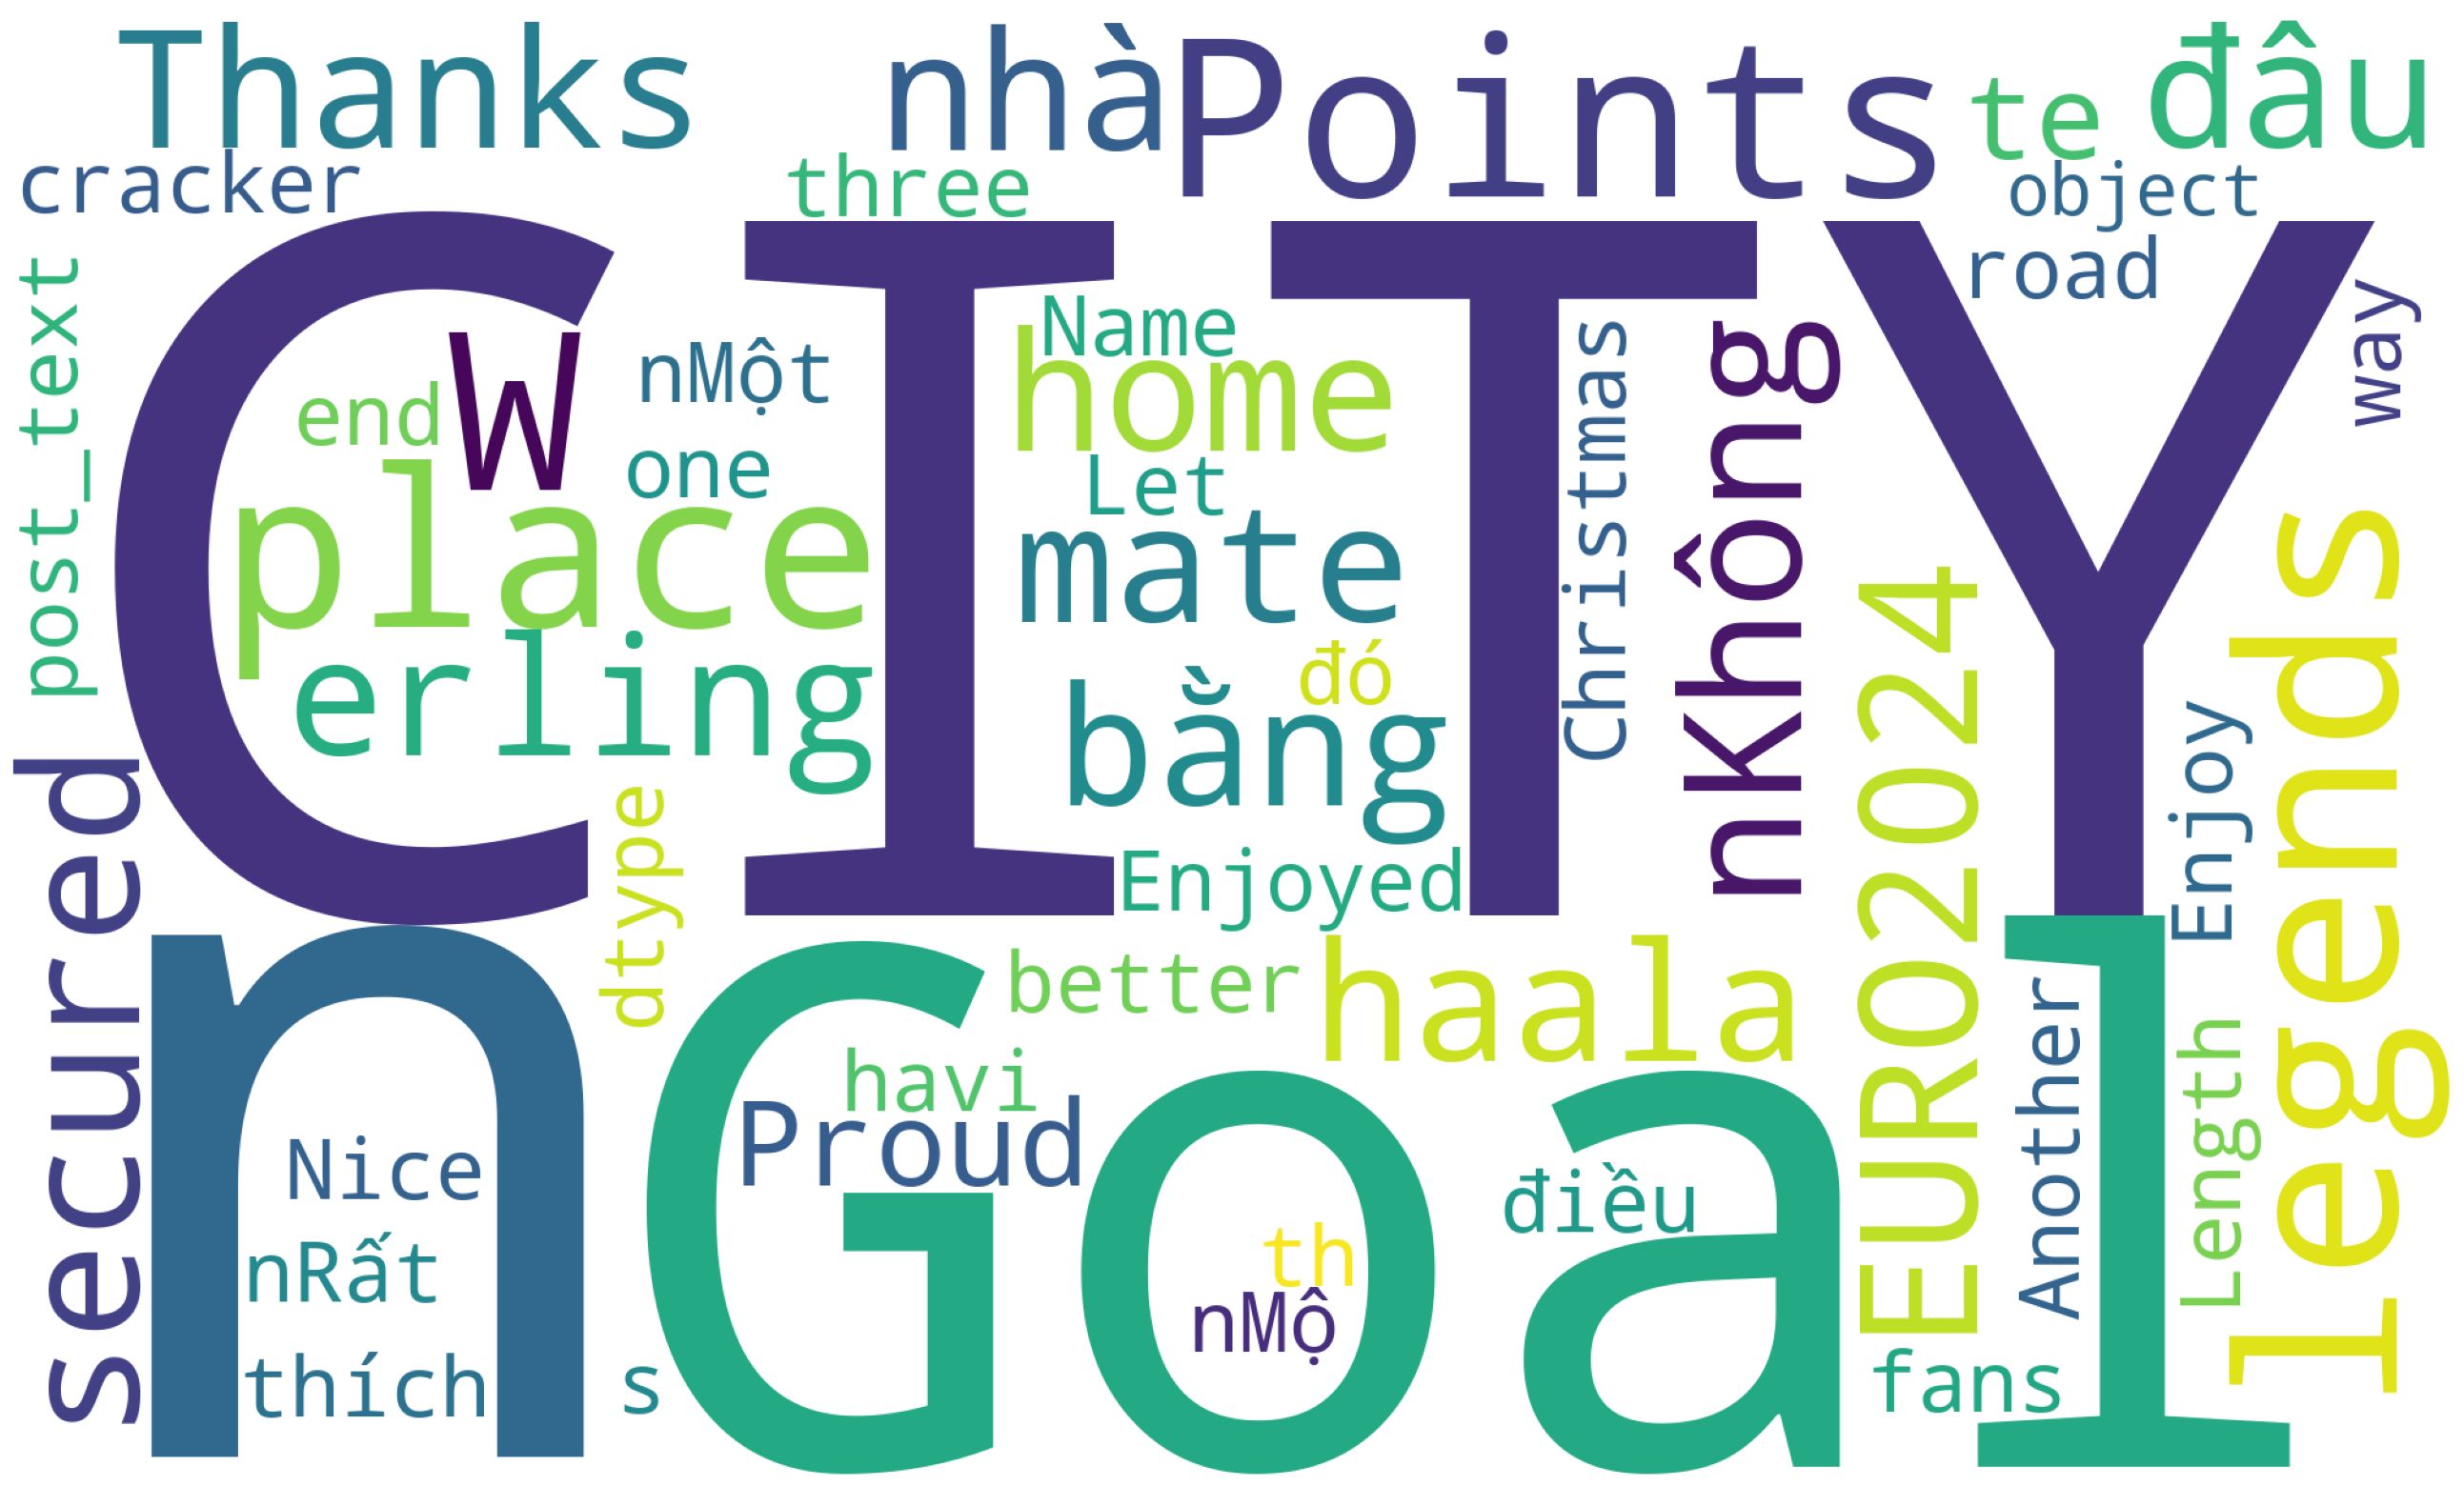

In [90]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [91]:
text_fix=text 
print(len(text))
text

670


'0      CITY CITY CITY 🔵 Thanks my mate, @erling.haala...\n1           No place like home 🏡\\n\\nKhông đâu bằng nhà 🏡\n2      Our #EURO2024 place secured 🔒 Proud of this te...\n3            Enjoyed that one! 😁\\n\\nRất thích điều đó! 😁\n4      Another W 😎 Nice to get a goal too 🙏🏻\\n\\nMột W...\n                             ...                        \n111    3️⃣ Points 1️⃣ Goal on the road. Let’s be havi...\n112    Goal and three points… no better way to end th...\n113    A Christmas cracker!! Enjoy City fans 🎄🎉\\n\\nMộ...\n114                                                 ❄️❄️\n115    There are legends and then there are legends. ...\nName: post_text, Length: 116, dtype: object'